# Homework 2 - IEEE Fraud Detection

For all parts below, answer all parts as shown in the Google document for Homework 2. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Fraudulent vs Non-Fraudulent Transaction

In [190]:
#Importing Pandas
import pandas as pd

In [191]:
# Read Identity CSV
df_identity = pd.read_csv(r'I:\Data Science Fundamentals\train_identity.csv')

In [192]:
# Read Transaction CSV
df_transaction=pd.read_csv(r'I:\Data Science Fundamentals\train_transaction.csv')

In [193]:
# Crop the Identity CSV to columns needed
identity_columns=df_identity[['TransactionID','DeviceType','DeviceInfo']]

In [194]:
identity_columns.head(2)

,TransactionID,DeviceType,DeviceInfo
0,2987004,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,mobile,iOS Device


In [195]:
# Convert the Timedelta from a default timestamp
#df_transaction['TransactionDT']=pd.to_datetime(df_transaction['TransactionDT'], unit='s')

In [196]:
# Crop the Transaction CSV to columns needed
transaction_columns=df_transaction[['TransactionID','TransactionDT','TransactionAmt','ProductCD','isFraud','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2']]

In [197]:
transaction_columns.head(2)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,isFraud,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2
0,2987000,86400,68.5,W,0,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN
1,2987001,86401,29.0,W,0,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN


In [198]:
# Complete Column List
df_transaction_identity=transaction_columns.merge(identity_columns,how='outer')

In [199]:
df_transaction_identity.head(10)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,isFraud,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceType,DeviceInfo
0,2987000,86400,68.5,W,0,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN,NaN,NaN
1,2987001,86401,29.0,W,0,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN,NaN,NaN
2,2987002,86469,59.0,W,0,visa,debit,outlook.com,NaN,330.0,87.0,287.0,NaN,NaN,NaN
3,2987003,86499,50.0,W,0,mastercard,debit,yahoo.com,NaN,476.0,87.0,NaN,NaN,NaN,NaN
4,2987004,86506,50.0,H,0,mastercard,credit,gmail.com,NaN,420.0,87.0,NaN,NaN,mobile,SAMSUNG SM-G892A Build/NRD90M
5,2987005,86510,49.0,W,0,visa,debit,gmail.com,NaN,272.0,87.0,36.0,NaN,NaN,NaN
6,2987006,86522,159.0,W,0,visa,debit,yahoo.com,NaN,126.0,87.0,0.0,NaN,NaN,NaN
7,2987007,86529,422.5,W,0,visa,debit,mail.com,NaN,325.0,87.0,NaN,NaN,NaN,NaN
8,2987008,86535,15.0,H,0,visa,debit,anonymous.com,NaN,337.0,87.0,NaN,NaN,mobile,iOS Device
9,2987009,86536,117.0,W,0,mastercard,debit,yahoo.com,NaN,204.0,87.0,19.0,NaN,NaN,NaN


In [200]:
#Filter Fraud Transactions
Fraud_Transactions_Boolean=df_transaction_identity['isFraud']==1
Fraud_Transactions=df_transaction_identity[Fraud_Transactions_Boolean]
#Filter Non-Fraudulent Transactions
Non_Fraud_Transactions_Boolean=df_transaction_identity['isFraud']==0
Non_Fraud_Transactions=df_transaction_identity[Non_Fraud_Transactions_Boolean]

In [201]:
Fraud_Transactions.head(10)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,isFraud,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceType,DeviceInfo
203,2987203,89760,445.000,W,1,visa,credit,aol.com,NaN,251.0,87.0,NaN,NaN,NaN,NaN
240,2987240,90193,37.098,C,1,visa,credit,hotmail.com,hotmail.com,NaN,NaN,NaN,NaN,mobile,Redmi Note 4 Build/MMB29M
243,2987243,90246,37.098,C,1,visa,credit,hotmail.com,hotmail.com,NaN,NaN,NaN,NaN,mobile,Redmi Note 4 Build/MMB29M
245,2987245,90295,37.098,C,1,visa,credit,hotmail.com,hotmail.com,NaN,NaN,NaN,NaN,mobile,Redmi Note 4 Build/MMB29M
288,2987288,90986,155.521,C,1,visa,credit,outlook.com,outlook.com,NaN,NaN,NaN,NaN,mobile,NaN
367,2987367,92350,225.000,R,1,mastercard,credit,gmail.com,gmail.com,472.0,87.0,NaN,NaN,desktop,rv:52.0
405,2987405,92999,90.570,C,1,mastercard,credit,gmail.com,gmail.com,NaN,NaN,NaN,NaN,mobile,NaN
630,2987630,97843,12.326,C,1,mastercard,debit,gmail.com,gmail.com,NaN,NaN,NaN,7.0,desktop,Windows
683,2987683,99584,124.344,C,1,mastercard,debit,gmail.com,gmail.com,NaN,NaN,NaN,7.0,desktop,Windows
736,2987736,100591,100.000,W,1,visa,credit,yahoo.com,NaN,231.0,87.0,NaN,NaN,NaN,NaN


In [202]:
Non_Fraud_Transactions.head(10)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,isFraud,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceType,DeviceInfo
0,2987000,86400,68.5,W,0,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN,NaN,NaN
1,2987001,86401,29.0,W,0,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN,NaN,NaN
2,2987002,86469,59.0,W,0,visa,debit,outlook.com,NaN,330.0,87.0,287.0,NaN,NaN,NaN
3,2987003,86499,50.0,W,0,mastercard,debit,yahoo.com,NaN,476.0,87.0,NaN,NaN,NaN,NaN
4,2987004,86506,50.0,H,0,mastercard,credit,gmail.com,NaN,420.0,87.0,NaN,NaN,mobile,SAMSUNG SM-G892A Build/NRD90M
5,2987005,86510,49.0,W,0,visa,debit,gmail.com,NaN,272.0,87.0,36.0,NaN,NaN,NaN
6,2987006,86522,159.0,W,0,visa,debit,yahoo.com,NaN,126.0,87.0,0.0,NaN,NaN,NaN
7,2987007,86529,422.5,W,0,visa,debit,mail.com,NaN,325.0,87.0,NaN,NaN,NaN,NaN
8,2987008,86535,15.0,H,0,visa,debit,anonymous.com,NaN,337.0,87.0,NaN,NaN,mobile,iOS Device
9,2987009,86536,117.0,W,0,mastercard,debit,yahoo.com,NaN,204.0,87.0,19.0,NaN,NaN,NaN


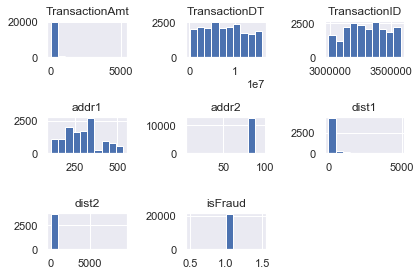

In [203]:
# Import matplotlib to examine distributions
import matplotlib.pyplot as plt
# Import numpy to get better histogram distributions
import numpy as np
# Histogram for Fraudulent Transactions
hists = Fraud_Transactions.hist()
plt.tight_layout()


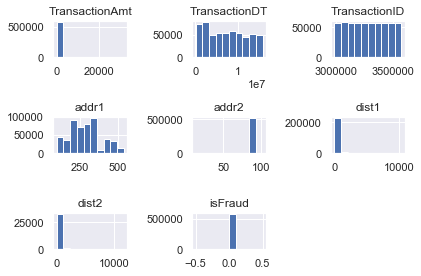

In [204]:
# Import matplotlib to examine distributions
import matplotlib.pyplot as plt
# Histogram for Non Fraudulent Transactions
hists = Non_Fraud_Transactions.hist()
plt.tight_layout()

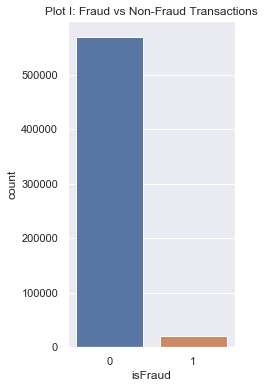

In [205]:
# Importing seaborn for doing plotting
import seaborn as sns
# Now,let's get the count of Fraud vs Non-Fraud Transactions
# https://seaborn.pydata.org/generated/seaborn.countplot.html
f, axes = plt.subplots(1, 1, figsize=(3, 6))
isFraud = sns.countplot(x='isFraud', data=df_transaction_identity)
plt.title("Plot I: Fraud vs Non-Fraud Transactions")
plt.show() 

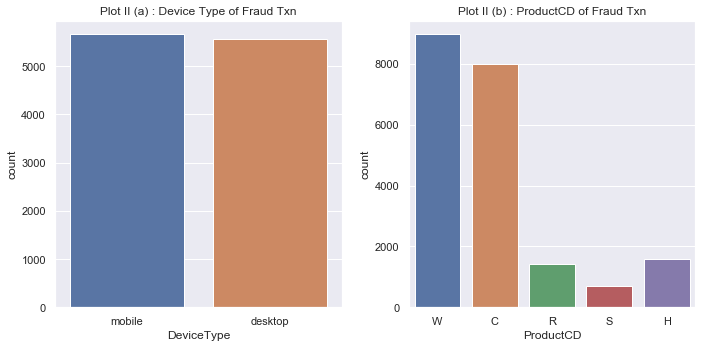

In [206]:
# For Plot II, I will plot the Fraud Transactions according to the DeviceType, and the ProductCD 
f, axes = plt.subplots(1, 2, figsize=(10, 5))
DeviceType = sns.countplot(x='DeviceType', data=Fraud_Transactions, ax=axes[0]).set_title("Plot II (a) : Device Type of Fraud Txn")
ProductCD = sns.countplot(x='ProductCD', data=Fraud_Transactions, ax=axes[1]).set_title("Plot II (b) : ProductCD of Fraud Txn")
plt.tight_layout()

**Observation: From Plot II (a), it can be established that its hard to distinguish between the number of fraud transactions, that occured on mobile and desktop, as they are almost equal. Also, from Plot II (b), it can be confirmed that the products having ProductCD 'W' have highest number of fraud transactions.

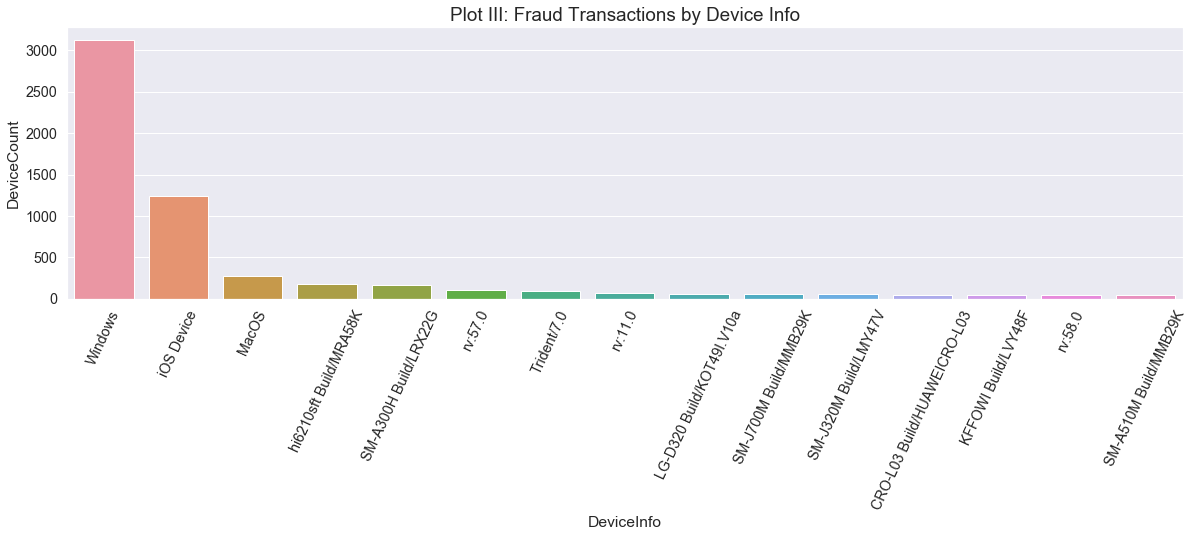

In [207]:
# For Plot III, I am trying to plot the Fraud Transactions according to the DeviceInfo. As there are too many device types,
# I will limit the graph to the top 15 devices
# Ref: https://seaborn.pydata.org/generated/seaborn.barplot.html
# Ref: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf 
fraud = pd.DataFrame()
fraud['DeviceCount'] = Fraud_Transactions.groupby(['DeviceInfo'])['DeviceInfo'].count()
fraud['DeviceInfo'] = fraud.index
group_top = fraud.sort_values(by='DeviceCount',ascending=False).head(15)

plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="DeviceInfo", y="DeviceCount", data=group_top)

font_size= {'size': 'large'}
ax.set_title("Plot III: Fraud Transactions by Device Info", **font_size)
xt = plt.xticks(rotation=65)

**Observation: From Plot III, it can be established that Fraud transaction cases come mostly from Windows and iOS devices. This is predictable given the vast majority of all transactions come from those systems.

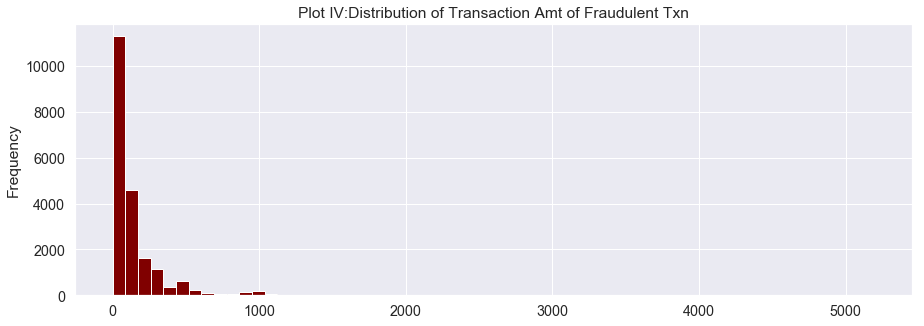

In [208]:
# For Plot IV,I am first plotting the distribution of Transaction Amt of Fraudulent Txn
Fraud_Transactions['TransactionAmt'] \
    .plot(kind='hist',
          bins=60,
          figsize=(15, 5),
          color="maroon",
          title='Plot IV:Distribution of Transaction Amt of Fraudulent Txn')
plt.show()

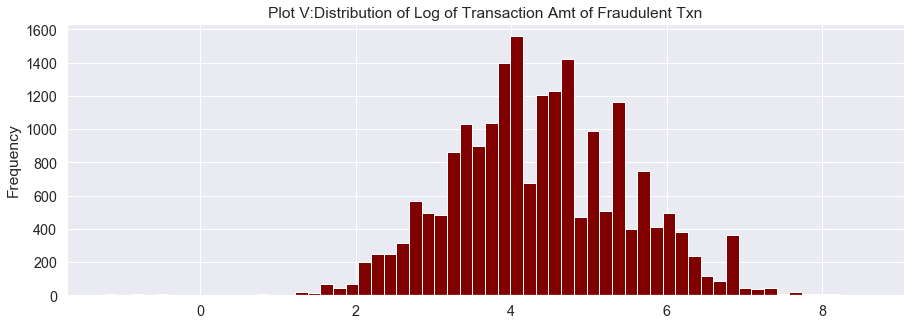

In [209]:
# For Plot V,I am plotting the distribution of Log of Transaction Amt of Fraudulent Txn, as it gives a better distribution
Fraud_Transactions['TransactionAmt'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=60,
          figsize=(15, 5),
          color="maroon",
          title='Plot V:Distribution of Log of Transaction Amt of Fraudulent Txn')
plt.show()

**From Plot V, it can be concluded that taking the log gives us a better distribution, as the transaction amounts lies within a narrow range.

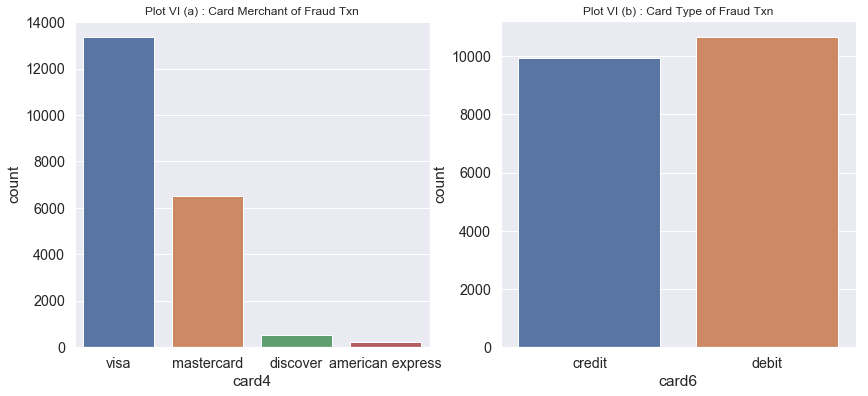

In [210]:
# For Plot VI,I am plotting the distribution of the card merchant as well as the card type of Fraud Txn
f, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.set(color_codes=True)
card4 = sns.countplot(x='card4', data=Fraud_Transactions, ax=axes[0]).set_title("Plot VI (a) : Card Merchant of Fraud Txn")
card6 = sns.countplot(x='card6', data=Fraud_Transactions, ax=axes[1]).set_title("Plot VI (b) : Card Type of Fraud Txn")

**From Plot VI(a), it can be established that maximum fraud transactions occur when the card merchant is VISA. Also, from Plot VI(b), we see more fraud happening in debit transactions.

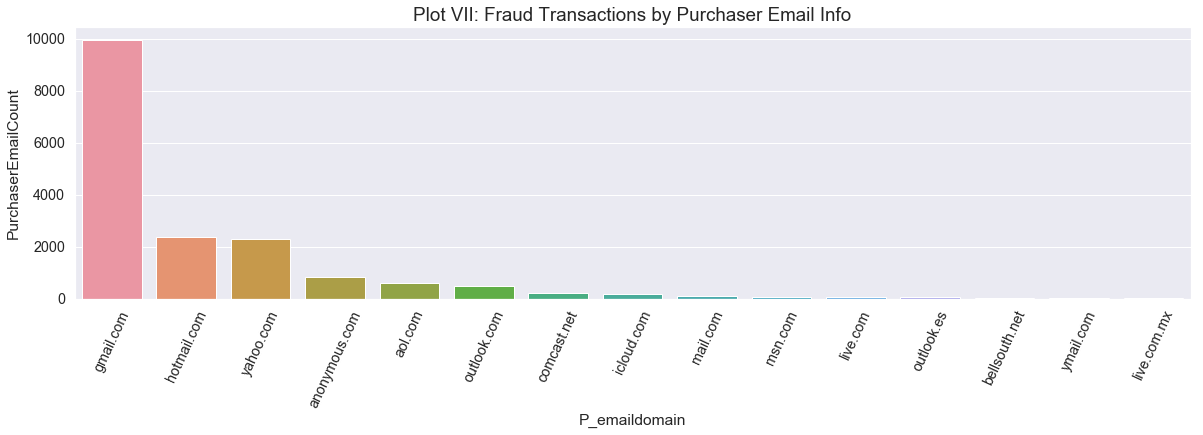

In [211]:
# For Plot VII, I am plotting the Fraud Transactions according to the Purchaser Email Domain. As there are too many such types,
# I will limit the graph to the top 15 email domains
fraud = pd.DataFrame()
fraud['PurchaserEmailCount'] = Fraud_Transactions.groupby(['P_emaildomain'])['P_emaildomain'].count()
fraud['P_emaildomain'] = fraud.index
group_top = fraud.sort_values(by='PurchaserEmailCount',ascending=False).head(15)

plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="P_emaildomain", y="PurchaserEmailCount", data=group_top)

font_size= {'size': 'large'}
ax.set_title("Plot VII: Fraud Transactions by Purchaser Email Info", **font_size)
xt = plt.xticks(rotation=65)

**From Plot VII, we see that most of the purchaser email domain associated with fraud transactions come from gmail.com

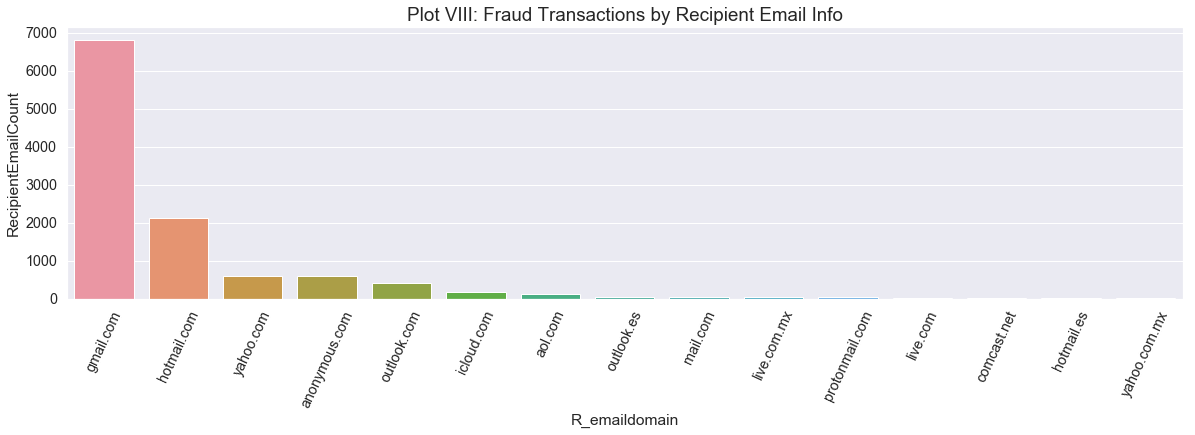

In [212]:
# For Plot VIII, I am plotting the Fraud Transactions according to the Recipient Email Domain. As there are too many such types,
# I will limit the graph to the top 15 email domains
fraud = pd.DataFrame()
fraud['RecipientEmailCount'] = Fraud_Transactions.groupby(['R_emaildomain'])['R_emaildomain'].count()
fraud['R_emaildomain'] = fraud.index
group_top = fraud.sort_values(by='RecipientEmailCount',ascending=False).head(15)

plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="R_emaildomain", y="RecipientEmailCount", data=group_top)

font_size= {'size': 'large'}
ax.set_title("Plot VIII: Fraud Transactions by Recipient Email Info", **font_size)
xt = plt.xticks(rotation=65)

**From Plot VIII, we see that most of the receiver email domain associated with fraud transactions come from gmail.com, as well.

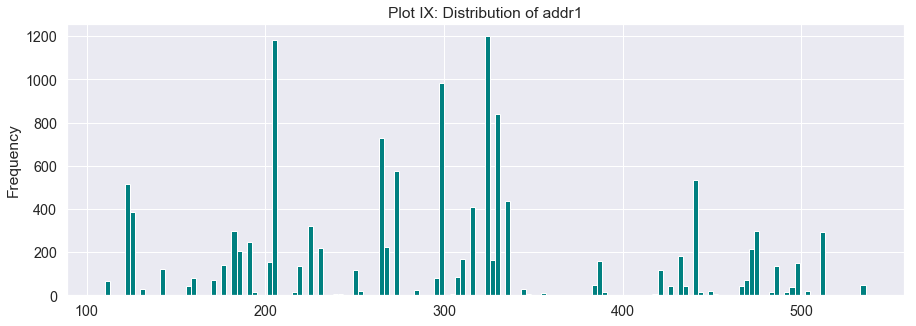

In [213]:
# For Plot IX,I am plotting the distribution of the addr1 field associated with Fraudulent Txn
Fraud_Transactions['addr1'] \
    .plot(kind='hist',
          bins=150,
          figsize=(15, 5),
          color="teal",
          title='Plot IX: Distribution of addr1')
plt.show()

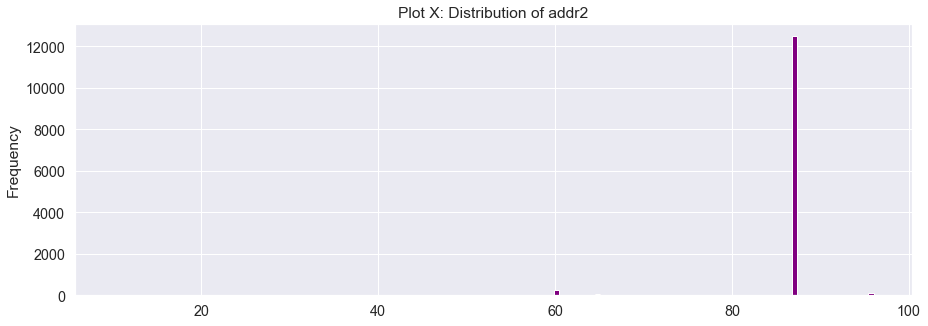

In [214]:
# For Plot X,I am plotting the distribution of the addr2 field associated with Fraudulent Txn
Fraud_Transactions['addr2'] \
    .plot(kind='hist',
          bins=150,
          figsize=(15, 5),
          color="purple",
          title='Plot X: Distribution of addr2')
plt.show()

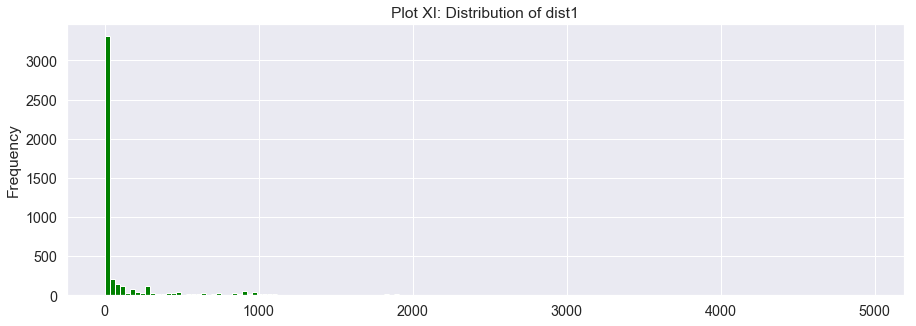

In [215]:
# For Plot XI,I am plotting the distribution of dist1 of Fraudulent Txn
Fraud_Transactions['dist1'] \
    .plot(kind='hist',
          bins=150,
          figsize=(15, 5),
          color="green",
          title='Plot XI: Distribution of dist1')
plt.show()

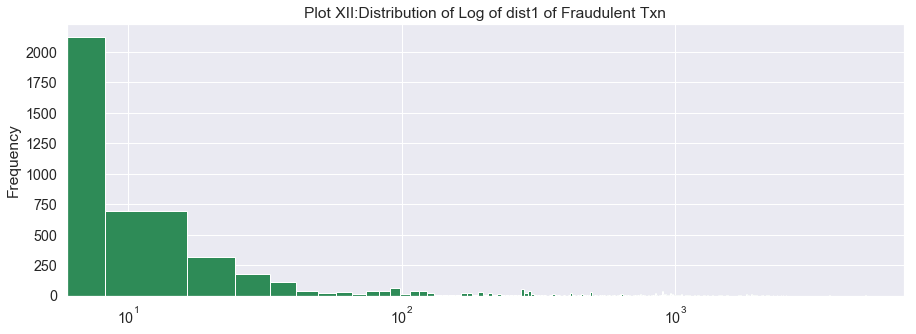

In [216]:
#  For Plot XII,I am plotting the log of distribution of dist1 of Fraudulent Txn
Fraud_Transactions['dist1'] \
    .plot(kind='hist',
          bins=600,
          figsize=(15, 5),
          color="seagreen",
          title='Plot XII:Distribution of Log of dist1 of Fraudulent Txn', logx="true")
plt.show()

**From Plot XII, it can be concluded that taking the log gives us a better distribution, as the dist1 values lies within a narrow range.

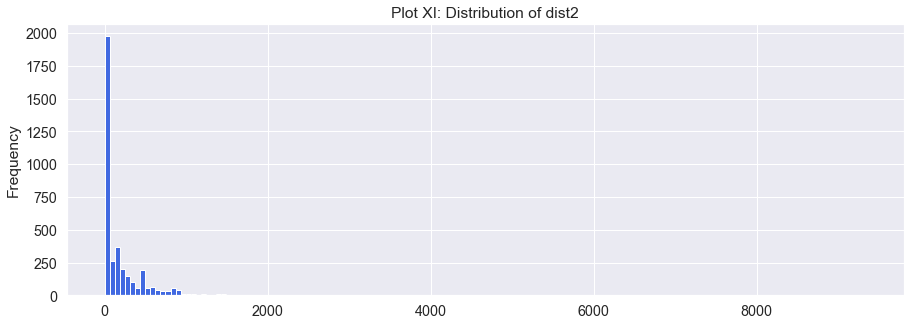

In [217]:
# For Plot XIII,I am plotting the distribution of dist2 of Fraudulent Txn
Fraud_Transactions['dist2'] \
    .plot(kind='hist',
          bins=150,
          figsize=(15, 5),
          color="royalblue",
          title='Plot XI: Distribution of dist2')
plt.show()

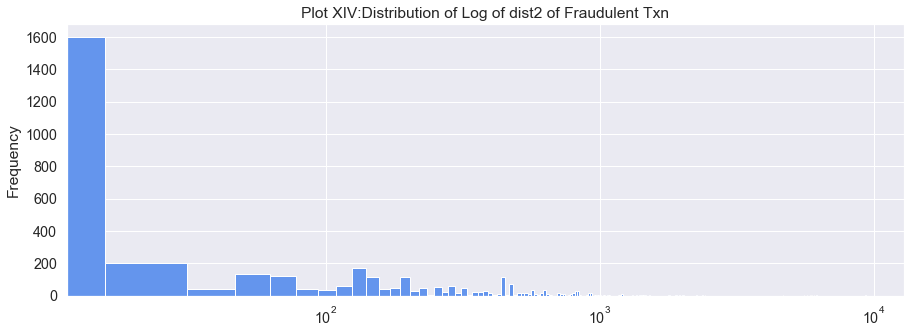

In [218]:
#  For Plot XIV,I am plotting the log of distribution of dist2 of Fraudulent Txn
Fraud_Transactions['dist2'] \
    .plot(kind='hist',
          bins=600,
          figsize=(15, 5),
          color="cornflowerblue",
          title='Plot XIV:Distribution of Log of dist2 of Fraudulent Txn', logx="true")
plt.show()

**From Plot XIV, it can be concluded that taking the log gives us a better distribution, as the dist2 values lies within a narrow range, just like dist1.

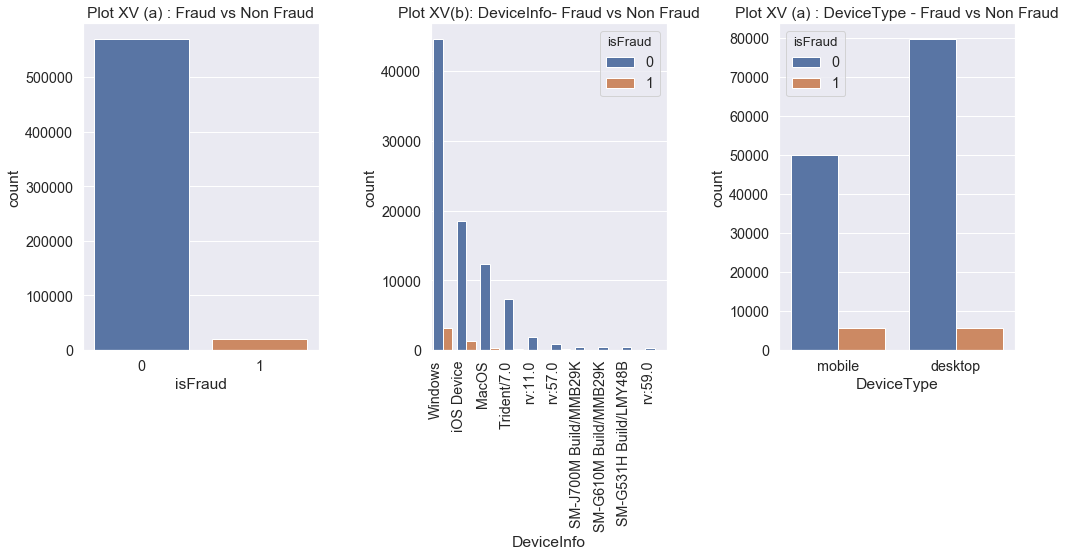

In [219]:
# Plot XV Fraud vs Non Fraud for DeviceInfo and DeviceType
f, axes = plt.subplots(1, 3, figsize=(15, 8))
isFraud = sns.countplot(x='isFraud', data=df_transaction_identity, ax=axes[0]).set_title("Plot XV (a) : Fraud vs Non Fraud")
DeviceInfo = sns.countplot(x='DeviceInfo', hue="isFraud", data=df_transaction_identity, order=pd.value_counts(df_transaction_identity['DeviceInfo']).iloc[:10].index, ax=axes[1])#.set_title("Plot XV (b) : ProductCD - Fraud vs Non Fraud")
DeviceInfo.set_xticklabels(DeviceInfo.get_xticklabels(), rotation=90, ha="right")
DeviceInfo.set_title("Plot XV(b): DeviceInfo- Fraud vs Non Fraud")
DeviceType = sns.countplot(x='DeviceType', hue="isFraud", data=df_transaction_identity, ax=axes[2]).set_title("Plot XV (a) : DeviceType - Fraud vs Non Fraud")
plt.tight_layout()

**From Plot XV, we can make 
(a) Fraud Transactions are very less compared to Non-Fraud Transactions.
(b) Althought the number of fraud transactions is very high for Windows devices, but again, the number of non-fraud transactions is also very high.
(c) Desktop has a larger number of non-fraud transactions, compared to mobile, while the number of fraud transactions is comparable in both the cases.

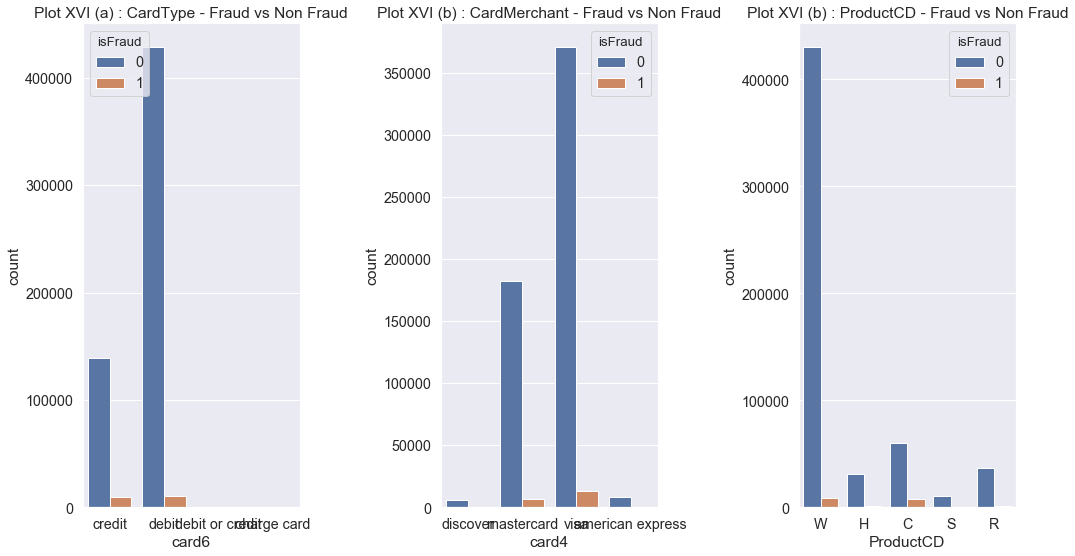

In [220]:
# Plot XVI Fraud vs Non Fraud for CardType,CardMerchant and ProductCD
f, axes = plt.subplots(1, 3, figsize=(15, 8))
ProductCD = sns.countplot(x='ProductCD', hue="isFraud", data=df_transaction_identity, ax=axes[2]).set_title("Plot XVI (b) : ProductCD - Fraud vs Non Fraud")
CardMerchant = sns.countplot(x='card4', hue="isFraud", data=df_transaction_identity, ax=axes[1]).set_title("Plot XVI (b) : CardMerchant - Fraud vs Non Fraud")
CardType = sns.countplot(x='card6', hue="isFraud", data=df_transaction_identity, ax=axes[0]).set_title("Plot XVI (a) : CardType - Fraud vs Non Fraud")
plt.tight_layout()

**From Plot XVI, the following observations can be made:
(a) Debit has a larger number of non-fraud transactions, compared to credit, while the number of fraud transactions is comparable in both the cases.
(b) Both Discover and Amex have hardly any fraud transactions.
(c) Products with code 'C' has the highest proportion of Fraud Transactions.

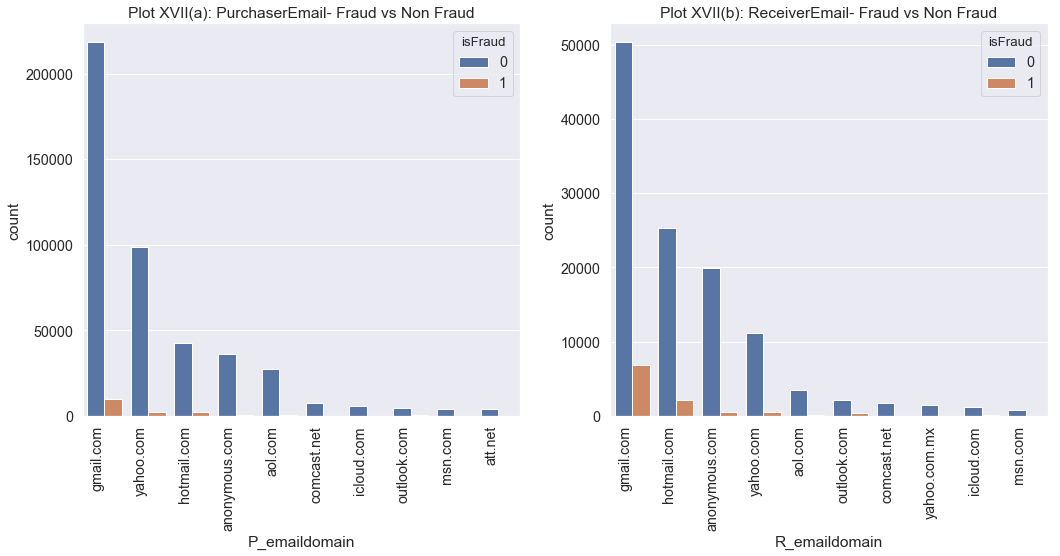

In [221]:
# Plot XVII Fraud vs Non Fraud for PurchaserEmail and ReceiverEmail
f, axes = plt.subplots(1, 2, figsize=(15, 8))
PurchaserEmail = sns.countplot(x='P_emaildomain', hue="isFraud", data=df_transaction_identity,order=pd.value_counts(df_transaction_identity['P_emaildomain']).iloc[:10].index, ax=axes[0])
PurchaserEmail.set_xticklabels(PurchaserEmail.get_xticklabels(), rotation=90, ha="right")
PurchaserEmail.set_title("Plot XVII(a): PurchaserEmail- Fraud vs Non Fraud")
ReceiverEmail = sns.countplot(x='R_emaildomain', hue="isFraud", data=df_transaction_identity,order=pd.value_counts(df_transaction_identity['R_emaildomain']).iloc[:10].index, ax=axes[1])
ReceiverEmail.set_xticklabels(ReceiverEmail.get_xticklabels(), rotation=90, ha="right")
ReceiverEmail.set_title("Plot XVII(b): ReceiverEmail- Fraud vs Non Fraud")
plt.tight_layout()

From Plot XVII, we can make the following observations:
(a) For both Purchaser Email and Receiver Email, we see that both gmail.com and hotmail.com are in top 3 of email service providers, meaning, that these are the most used services.
(b) We also see the presence of a domain called 'anonymous.com', which might be used by people who don't want to reveal their information.

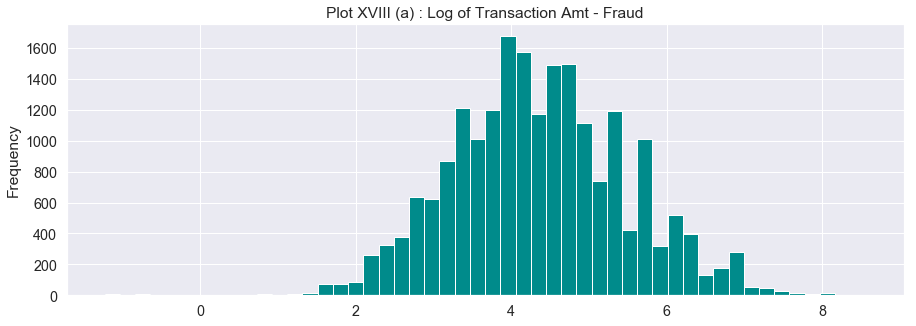

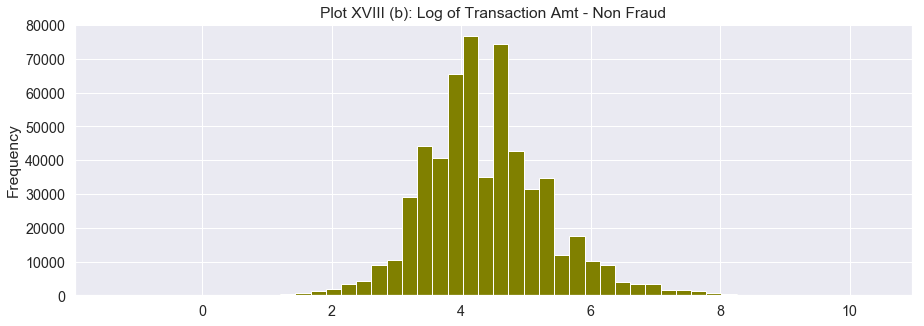

In [222]:
# Plot XVIII Fraud vs Non Fraud for Log of Transaction Amount
Fraud_Transactions['TransactionAmt'].apply(np.log).plot(kind='hist',bins=50, figsize=(15,5), 
                                                 title='Plot XVIII (a) : Log of Transaction Amt - Fraud', color='darkcyan')
plt.show()
Non_Fraud_Transactions['TransactionAmt'].apply(np.log).plot(kind='hist', bins=50, figsize=(15,5), title='Plot XVIII (b): Log of Transaction Amt - Non Fraud',color='olive')
plt.show()

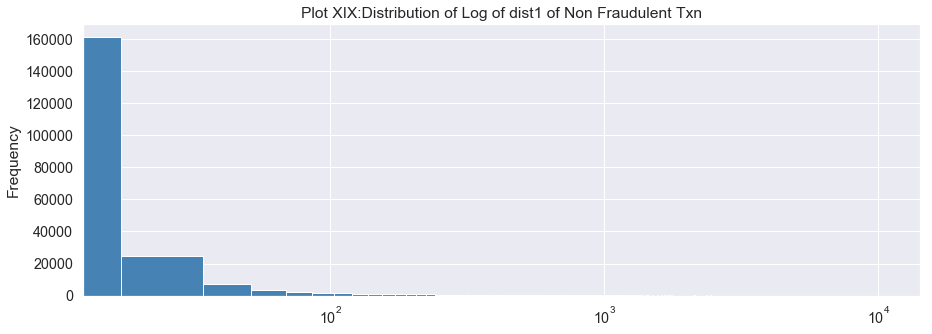

In [223]:
# Plot XIX Non Fraud for Log of dist1
# Check Plot XII for Fraud for Log of dist1
Non_Fraud_Transactions['dist1'] \
    .plot(kind='hist',
          bins=600,
          figsize=(15, 5),
          color="steelblue",
          title='Plot XIX:Distribution of Log of dist1 of Non Fraudulent Txn', logx="true")
plt.show()

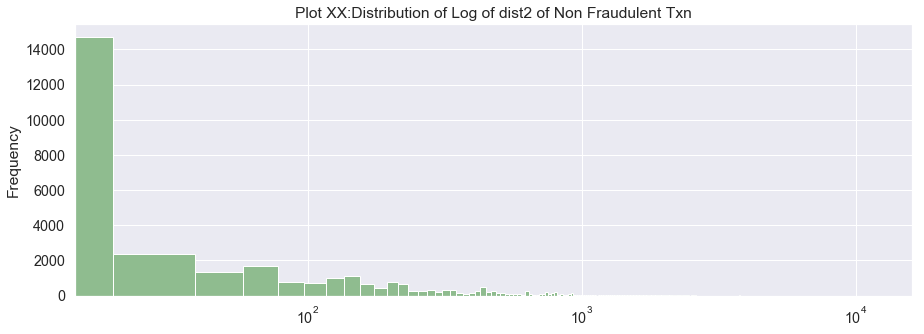

In [224]:
# For Plot XX,I am plotting the distribution of dist2 of Non Fraudulent Txn
# Check Plot XIV for Fraudulent Txn
Non_Fraud_Transactions['dist2'] \
    .plot(kind='hist',
          bins=600,
          figsize=(15, 5),
          color="darkseagreen",
          title='Plot XX:Distribution of Log of dist2 of Non Fraudulent Txn', logx="true")
plt.show()

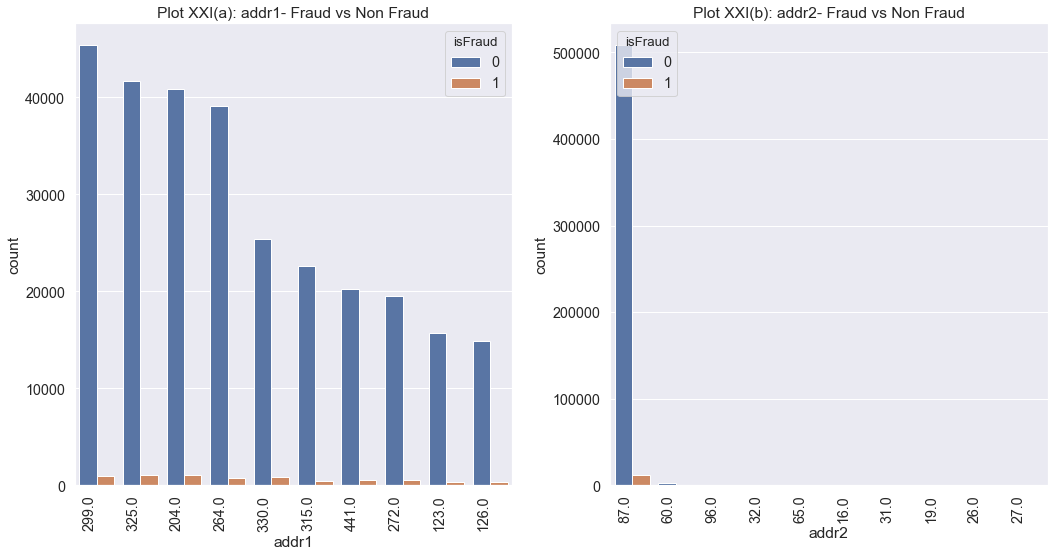

In [225]:
# Plot XXI Fraud vs Non Fraud for addr1 and addr2
f, axes = plt.subplots(1, 2, figsize=(15, 8))
Address1 = sns.countplot(x='addr1', hue="isFraud", data=df_transaction_identity,order=pd.value_counts(df_transaction_identity['addr1']).iloc[:10].index, ax=axes[0])
Address1.set_xticklabels(Address1.get_xticklabels(), rotation=90, ha="right")
Address1.set_title("Plot XXI(a): addr1- Fraud vs Non Fraud")
Address2 = sns.countplot(x='addr2', hue="isFraud", data=df_transaction_identity,order=pd.value_counts(df_transaction_identity['addr2']).iloc[:10].index, ax=axes[1])
Address2.set_xticklabels(Address2.get_xticklabels(), rotation=90, ha="right")
Address2.set_title("Plot XXI(b): addr2- Fraud vs Non Fraud")
plt.tight_layout()

## Part 2 - Transaction Frequency

In [226]:
# At the start of Task 2, first I am figuring out the addr2 value, having the maximum frequency
df_transaction_identity.addr2.mode()


0    87.0
dtype: float64

In [227]:
# Now I am filtering out the dataset, to create a new dataframe, having rows with addr2 value corresponding to the value we got previously
max_addr2_bool=df_transaction_identity['addr2']==87
max_addr2=df_transaction_identity[max_addr2_bool]

In [228]:
# Checking if data is properly filtered
max_addr2.count()

TransactionID     520481
TransactionDT     520481
TransactionAmt    520481
ProductCD         520481
isFraud           520481
card4             519100
card6             519103
P_emaildomain     428419
R_emaildomain      69932
addr1             520481
addr2             520481
dist1             238166
dist2              10710
DeviceType         78622
DeviceInfo         76083
dtype: int64

In [229]:
# Checking if data is properly filtered
df_transaction_identity.count()

TransactionID     590540
TransactionDT     590540
TransactionAmt    590540
ProductCD         590540
isFraud           590540
card4             588963
card6             588969
P_emaildomain     496084
R_emaildomain     137291
addr1             524834
addr2             524834
dist1             238269
dist2              37627
DeviceType        140810
DeviceInfo        118666
dtype: int64

In [230]:
# Here I am converting the timedelta to a proper datetime using a reference start time
import warnings
warnings.filterwarnings('ignore')
try:
    import datetime
    START_DATE = '2017-12-01'
    startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
    max_addr2['TransactionDT'] = max_addr2['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
except:
    print("Ok")


In [231]:
# After I get a proper datetime, now I add another field to max_addr2 dataframe, which will give me the hour of the transaction
try:
    max_addr2['hour']=pd.DatetimeIndex(max_addr2['TransactionDT']).hour
except:
    print("Ok")

In [232]:
# Checking if that worked
max_addr2.tail(2)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,isFraud,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceType,DeviceInfo,hour
590538,3577538,2018-06-01 23:58:08,117.00,W,0,mastercard,debit,aol.com,NaN,387.0,87.0,3.0,NaN,NaN,NaN,23
590539,3577539,2018-06-01 23:58:51,279.95,W,0,mastercard,credit,gmail.com,NaN,299.0,87.0,NaN,NaN,NaN,NaN,23


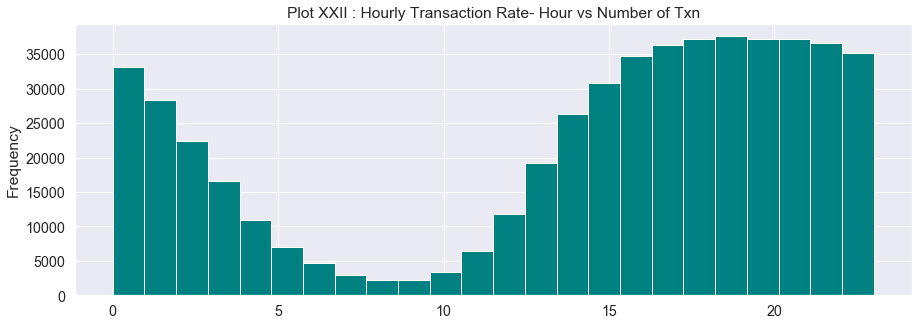

In [233]:
# For Plot XXII,I am plotting the distribution of number of transactions vs the hour of the day
max_addr2['hour'] \
    .plot(kind='hist',
          bins=24,
          figsize=(15, 5),
          color="teal",
          title='Plot XXII : Hourly Transaction Rate- Hour vs Number of Txn')
plt.show()

**Observation: From the hourly transaction rate which plots the number of transactions vs the hour of the day, it can be seen that the number of transactions start reducing from the 4th hour till the 12th hour. Hence, we can conclude that the people are generally awake from the 13th hour to 23rd hour, which continues from 0th hour to 3rd hour as well.

## Part 3 - Product Code

Text(0.5, 1.0, 'Plot XXIII : ProductCD vs Count of Transactions')

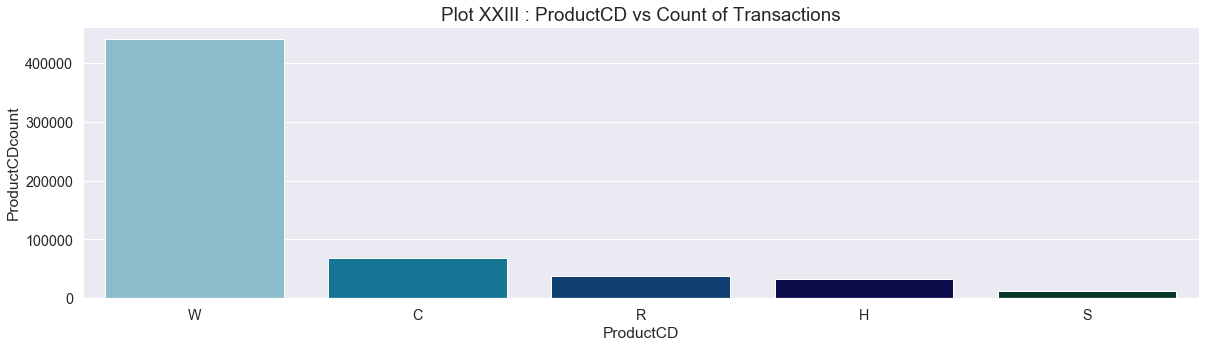

In [234]:
# At the start of Task 3, I am first getting the count of transactions per productcd
complete_data = pd.DataFrame()
complete_data['ProductCDcount'] = df_transaction_identity.groupby(['ProductCD'])['ProductCD'].count()
complete_data['ProductCD'] = complete_data.index
group_top = complete_data.sort_values(by='ProductCDcount',ascending=False)

plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="ProductCD", y="ProductCDcount",palette='ocean_r', data=group_top)

font_size= {'size': 'large'}
ax.set_title("Plot XXIII : ProductCD vs Count of Transactions", **font_size)

Text(0.5, 1.0, 'Plot XXIV : ProductCD vs Sum of Transaction Amount')

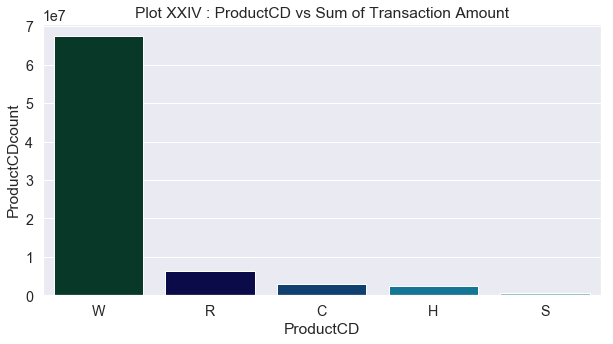

In [235]:
# Then, I am calculating the sum of transaction amounts per productcd
complete_data = pd.DataFrame()
complete_data['ProductCDcount'] = df_transaction_identity.groupby(['ProductCD'])['TransactionAmt'].sum()
complete_data['ProductCD'] = complete_data.index
group_top = complete_data.sort_values(by='ProductCDcount',ascending=False)

plt.figure(figsize=(10, 5))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="ProductCD", y="ProductCDcount",palette='ocean', data=group_top)

font_size= {'size': 'medium'}
ax.set_title("Plot XXIV : ProductCD vs Sum of Transaction Amount", **font_size)

Text(0.5, 1.0, 'Plot XXV : ProductCD vs Mean/Average of Transaction Amount')

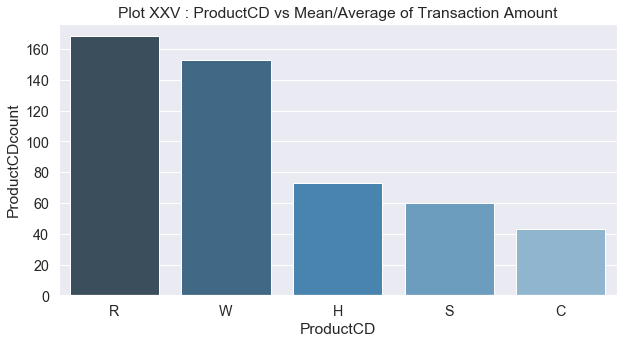

In [236]:
# Finally, I am calculating the average or mean of transaction amount per productcd
sns.set_style('ticks')
complete_data = pd.DataFrame()
complete_data['ProductCDcount'] = df_transaction_identity.groupby(['ProductCD'])['TransactionAmt'].mean()
complete_data['ProductCD'] = complete_data.index
group_top = complete_data.sort_values(by='ProductCDcount',ascending=False)

plt.figure(figsize=(10, 5))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="ProductCD", y="ProductCDcount",palette='Blues_d', data=group_top)

font_size= {'size': 'medium'}
ax.set_title("Plot XXV : ProductCD vs Mean/Average of Transaction Amount", **font_size)

**Observation: From Plot XXV, we can see that the most expensive product is the product having ProductCD='R', and the least expensive is the product having ProductCD='C'. This is because, to find this, I first found out the count and sum of the transaction amounts per ProductCD, and then find out its mean/average, which, gives the most expensive and least expensive products.

## Part 4 - Correlation Coefficient

In [237]:
# Task 4
# Here I am converting the timedelta to a proper datetime using a reference start time
try:
    import datetime
    START_DATE = '2017-12-01'
    startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
    df_transaction_identity['TransactionDT'] = df_transaction_identity['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
except:
    print("Ok")

In [238]:
# After I get a proper datetime, now I add another field to max_addr2 dataframe, which will give me the hour of the transaction
try:
    df_transaction_identity['hour']=pd.DatetimeIndex(df_transaction_identity['TransactionDT']).hour
except:
    print("Ok")

In [239]:
df_transaction_identity.head(2)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,isFraud,card4,card6,P_emaildomain,R_emaildomain,addr1,addr2,dist1,dist2,DeviceType,DeviceInfo,hour
0,2987000,2017-12-02 00:00:00,68.5,W,0,discover,credit,NaN,NaN,315.0,87.0,19.0,NaN,NaN,NaN,0
1,2987001,2017-12-02 00:00:01,29.0,W,0,mastercard,credit,gmail.com,NaN,325.0,87.0,NaN,NaN,NaN,NaN,0


In [240]:
df_transaction_identity['hour'].isnull().sum()

0

Text(0.5, 1.0, 'Plot XXVI : Hour vs Sum of Transaction Amount per Hour')

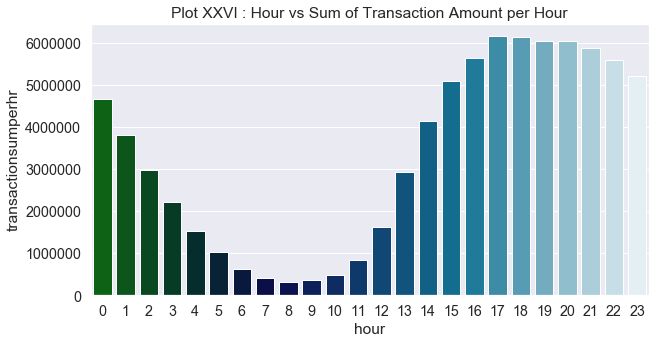

In [241]:
# Then, I am calculating the sum of transaction amounts per productcd
complete_datas = pd.DataFrame()
complete_datas['transactionsumperhr'] = df_transaction_identity.groupby(['hour'])['TransactionAmt'].sum()
complete_datas['hour'] = complete_datas.index
group_top = complete_datas.sort_values(by='transactionsumperhr',ascending=False)

plt.figure(figsize=(10, 5))
sns.set(color_codes=True)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="hour", y="transactionsumperhr",palette='ocean', data=group_top)

font_size= {'size': 'medium'}
ax.set_title("Plot XXVI : Hour vs Sum of Transaction Amount per Hour", **font_size)

In [242]:
hr_amount=df_transaction_identity[['hour','TransactionAmt']]
hr_amount.corr(method='pearson')

,hour,TransactionAmt
hour,1.000000,0.044532
TransactionAmt,0.044532,1.000000


**For Task 4, I plotted Plot XXVI, to show the distribution of time of day and the purchase amount. Also the correlation coefficient is calculated above, which comes out to be 0.044532, by Pearson method

## Part 5 - Interesting Plot

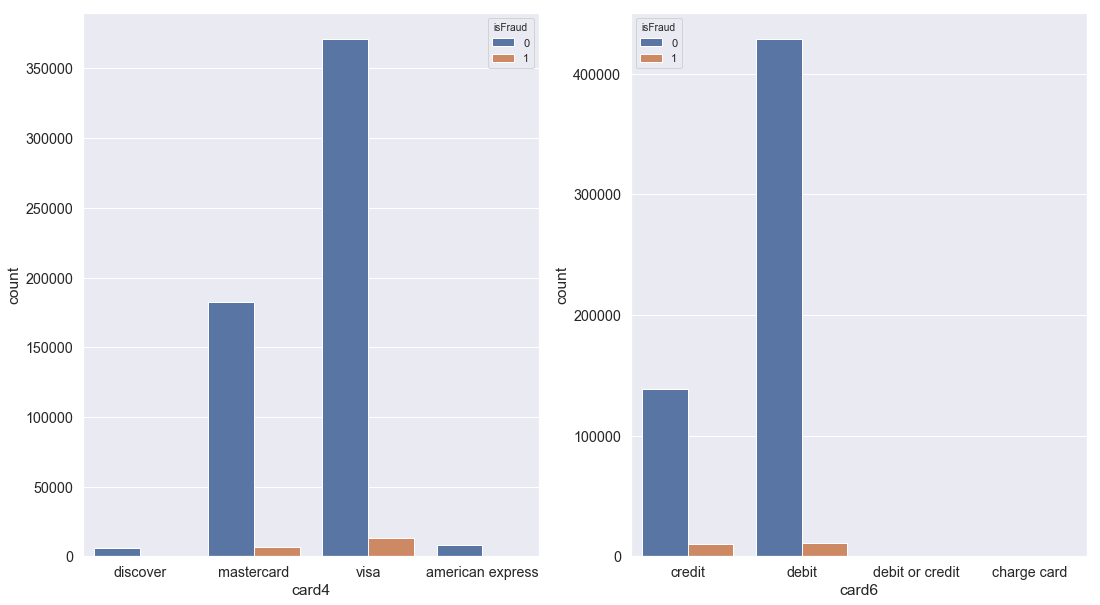

In [243]:
# In Task 5, I have first taken out the CardMerchant and CardType for Fraud vs Non-Fraud Txn
f, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.set(color_codes=True)
card4 = sns.countplot(x='card4', hue="isFraud", data=df_transaction_identity, ax=axes[0])
card6 = sns.countplot(x='card6', hue="isFraud", data=df_transaction_identity, ax=axes[1])

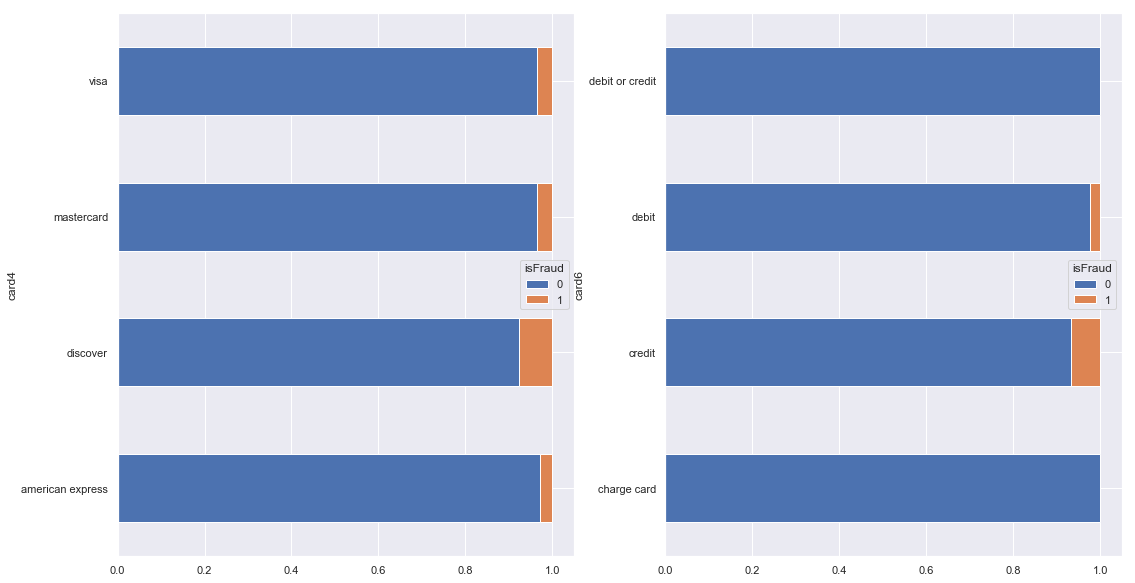

In [244]:
# Then, I took the above Plot and showed it as percentage
f, axes = plt.subplots(1, 2, figsize=(18, 10))

props = df_transaction_identity.groupby("card4")['isFraud'].value_counts(normalize=True).unstack()
p = props.plot(kind='barh', stacked='True', ax=axes[0])

props = df_transaction_identity.groupby("card6")['isFraud'].value_counts(normalize=True).unstack()
p = props.plot(kind='barh', stacked='True', ax=axes[1])

**Observation: The above plots gives us some interesting information, which are as follows:
(a) Visa has the highest number of Fraud Txns, but this number is only a minor proportion of all VISA transactions.
(b) Discover, on the other hand, has very few Fraud transactions, yet it has the highest proportion of all Discover transactions, meaning, the chances that if a Txn is Discover, then chances that it is Fraud is the highest.
(c) Although most Fraud transactions are done with Debit, yet when it comes to proportion of Fraud Transactions, Credit has the highest.

## Part 6 - Prediction Model

In [245]:
# For Task 6, I start by merging the two CSVs

model_df= df_transaction.merge(df_identity, how='left', on='TransactionID')

In [246]:
model_df.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
9,2987009,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
# Drop the columns which have more than 60% null values as they will not contribute much to the prediction model
nullp = model_df.isnull().sum()/model_df.shape[0]*100

column_drop = np.array(nullp[nullp > 60].index)

In [248]:
# List of columns dropped
column_drop

array(['dist2', 'R_emaildomain', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13',
       'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144',
       'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152',
       'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160',
       'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168',
       'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176',
       'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184',
       'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192',
       'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200',
       'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208',
       'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216',
       'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224',
       'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232',
       'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240',
       

In [249]:
# Loading Test Identity
identity_test=pd.read_csv(r'I:\Data Science Fundamentals\test_identity.csv')

In [250]:
# Loading Test Transaction
transaction_test=pd.read_csv(r'I:\Data Science Fundamentals\test_transaction.csv')

In [251]:
# Merging Both Transaction and Identity
test_transaction_identity= transaction_test.merge(identity_test, how='left', on='TransactionID')

In [252]:
# Drop Columns from both model_df and test_transaction_identity
model_df=model_df.drop(column_drop,axis=1)
test_transaction_identity=test_transaction_identity.drop(column_drop,axis=1)

In [253]:
# Fill Null Values with -999
model_df = model_df.fillna(-999)
test_transaction_identity = test_transaction_identity.fillna(-999)

In [254]:
# Create target(y_train) and feature variable(x_train)
y_train = model_df['isFraud']
x_train = model_df.drop('isFraud',axis=1)

In [255]:
# Label Encoding
# Ref: https://codeloop.org/python-machine-learning-label-encoding/
# Ref: https://www.programcreek.com/python/example/93350/sklearn.preprocessing.LabelEncoder
from sklearn import preprocessing
for f in x_train.columns:
    if x_train[f].dtype=='object' or test_transaction_identity[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[f].values) + list(test_transaction_identity[f].values))
        x_train[f] = lbl.transform(list(x_train[f].values))
        test_transaction_identity[f] = lbl.transform(list(test_transaction_identity[f].values))

In [256]:
# Create Baseline Model, that is, Logistic Regression, Kaggle Rank->5249, Score->0.79
# Ref: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression()
logisticreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [257]:
# Predict
submit = pd.read_csv(r'I:\Data Science Fundamentals\sample_submission.csv',index_col='TransactionID')
submit['isFraud'] = logisticreg.predict_proba(test_transaction_identity)[:,1]
submit.to_csv('Logisticreg_submission.csv')
submit.head()

,isFraud
TransactionID,
3663549,0.025644
3663550,0.029312
3663551,0.034953
3663552,0.030020
3663553,0.026786


In [258]:
# Create Second, hopefully, a better model, using XGB Classifier, Kaggle Rank->4837, Score->0.8969
# Ref: https://xgboost.readthedocs.io/en/latest/python/python_api.html
# Ref: https://www.programcreek.com/python/example/99824/xgboost.XGBClassifier
from xgboost import XGBClassifier
xgbmodel = XGBClassifier()
xgbmodel.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [259]:
# Predict
submit_xgb = pd.read_csv(r'I:\Data Science Fundamentals\sample_submission.csv',index_col='TransactionID')
submit['isFraud'] = xgbmodel.predict_proba(test_transaction_identity)[:,1]
submit.to_csv('XGB_submission.csv')
submit.head()

,isFraud
TransactionID,
3663549,0.005306
3663550,0.011927
3663551,0.015194
3663552,0.004945
3663553,0.011092


**Model Building Workflow:
(1) I started off by first merging the two required CSVs.
(2) Then, I found out the columns which have more than 60% null values as they will not contribute much to the prediction model.
(3) After that, I loaded both the test files and merged them.
(4) Next, I dropped the columns, which I found out from Step (2) from both the model and test dataframes.
(5) After that, I decided to use Random Imputation to fill the Null Values, and replace them with -999.
(6) Next, I created the target(y_train) and feature variable(x_train).
(7) Then, I carried out the process of Label Encoding, which is used to normalize labels as well as to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.
(8) After that, I decided to create a Baseline Model, to keep things simple. I did this by using Logistic Regression technique, and ran predictions on the sample_submission.csv file. This gave me a Kaggle rank of 5249 and score of 0.79.
(9) Finally, I decided to create a better model using XGB Classifier. When I ran predictions on the sample_submission.csv file, I got a better Kaggle rank of 4837 and score of 0.8969.

## Part 7 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/kaustavsbu

Highest Rank: 4837

Score: 0.8969

Number of entries: 2

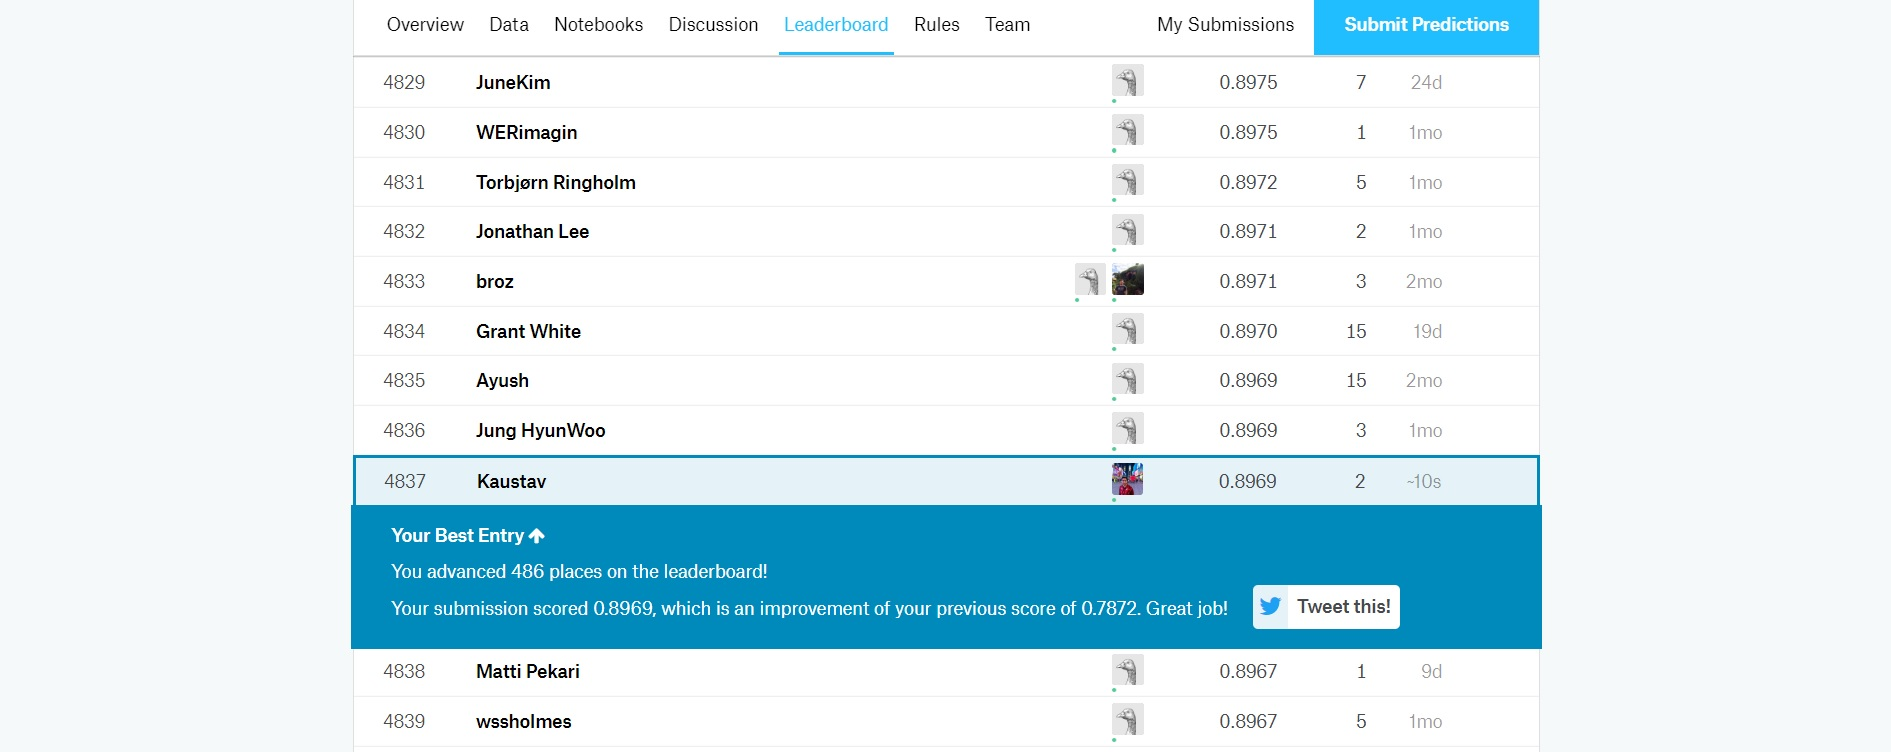